1. Top-10 Reviewer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp 

pd_data=pd.read_csv('Reviews.csv')
#載入資料
pd_data=pd_data[1:10000]
#只取前10000筆

In [3]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


In [26]:
visits=pd.value_counts(pd_data.UserId)
visits=visits[:10]
visits
#找出最常出現的UserId與出現次數

A1Z54EM24Y40LL    17
A2SZLNSI5KOQJT    10
A35R32TA60XD57     9
A281NPSIMI1C2R     8
A3PJZ8TU8FDQ1K     7
A3NHUQ33CFH3VM     7
A3OXHLG6DIBRW8     7
ABQN42N7ICNZQ      6
AQ6SHOW0VMZGF      6
A10H24TDLK2VDP     6
Name: UserId, dtype: int64

In [31]:
A=[]
B=[]
C=[]
D=[]
for i in range(10):
    A.append(visits.index[i])
    B.append(pd_data[pd_data['UserId'] == visits.index[i] ].iloc[0,3])
    C.append(visits[i])
    D.append(pd_data[pd_data['UserId'] == visits.index[i] ].mean()[3])
    
#取TOP 10的 UserId 與 ProfileName，求 Scorecount 和 Score mean
#A為UserId的資料
#B為ProfileName的資料
#C為Scorecount的資料
#D為Score mean的資料

In [28]:
print(A)
print(B)
print(C)
print(D)

['A1Z54EM24Y40LL', 'A2SZLNSI5KOQJT', 'A35R32TA60XD57', 'A281NPSIMI1C2R', 'A3PJZ8TU8FDQ1K', 'A3NHUQ33CFH3VM', 'A3OXHLG6DIBRW8', 'ABQN42N7ICNZQ', 'AQ6SHOW0VMZGF', 'A10H24TDLK2VDP']
['c2', 'Carrie, "Formerly &#34;Sister Carrie&#34;"', 'M. Torma', 'Rebecca of Amazon "The Rebecca Review"', 'Jared Castle', 'Citizen John', 'C. F. Hill "CFH"', 'T.O. Perspective', 'K. Padgett "familyof5"', 'William Jens Jensen']
[17, 10, 9, 8, 7, 7, 7, 6, 6, 6]
[3.8823529411764706, 3.8, 4.111111111111111, 5.0, 4.714285714285714, 3.142857142857143, 4.428571428571429, 4.333333333333333, 2.6666666666666665, 3.0]


In [29]:
content={'UserId':A,
         'ProfileName':B,
         'Scorecount':C,
         'Score mean':D,} 
new_sheet=pd.DataFrame(content)
#寫到表格中

In [30]:
new_sheet

,UserId,ProfileName,Scorecount,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
7,ABQN42N7ICNZQ,T.O. Perspective,6,4.333333
8,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


2. Plot score distribution for the user with the most number of reviews

In [11]:
top=pd_data[pd_data['UserId'] == visits.index[0] ]
top
#求出最常出現的人的各種資料

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
143,144,B001GVISJW,A1Z54EM24Y40LL,c2,0,0,5,1269129600,Great for the kids!,If you are looking for a less messy version of...
3587,3588,B004X8TK9W,A1Z54EM24Y40LL,c2,1,1,5,1338249600,AWESOME!,I may be dating myself here a bit but I rememb...
4993,4994,B000FA398U,A1Z54EM24Y40LL,c2,3,3,5,1203206400,Best for oyster soup!,Try these first for all your seafood soups and...
6371,6372,B000084EKO,A1Z54EM24Y40LL,c2,0,0,3,1090800000,Not any different than regular Friskies,I honestly cannot say that I saw any differenc...
6372,6373,B000084EKA,A1Z54EM24Y40LL,c2,0,0,4,1090972800,Not their best...,I think 9 Lives does a better job on this vari...
6373,6374,B000084EKB,A1Z54EM24Y40LL,c2,0,0,4,1091059200,Great food!,This version is ground. NOt my current cat's ...
6374,6375,B000084EKC,A1Z54EM24Y40LL,c2,1,1,5,1090972800,Great food for all cats!,"According to my cat, this stuff is just great...."
6375,6376,B000084EKD,A1Z54EM24Y40LL,c2,1,1,2,1090972800,Needs improved,I haven't had a cat yet that liked this one. ...
6380,6381,B000084EKG,A1Z54EM24Y40LL,c2,2,2,5,1090972800,Awesome food!,This is my cat's favorite one. He just licks ...
6382,6383,B000084EK8,A1Z54EM24Y40LL,c2,2,2,3,1090972800,Not the favorite in our house,Once or twice a year for a little variety and ...


Text(0, 0.5, 'Times')

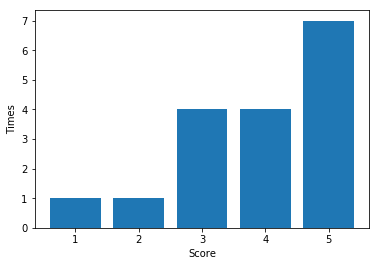

In [24]:
plt.bar(pd.value_counts(top.Score).index, pd.value_counts(top.Score))
plt.xlabel('Score')
plt.ylabel('Times')
#畫出該人的評分與對應的評分次數

3. Plot pandas Series DataFrame (Time->Date)

In [32]:
years=pd.to_datetime(pd_data.Time, unit='s').dt.year
years
#把pd_data的每個時間資料只取年份

1       2012
2       2008
3       2011
4       2012
5       2012
6       2012
7       2012
8       2011
9       2012
10      2005
11      2010
12      2012
13      2010
14      2010
15      2009
16      2012
17      2012
18      2011
19      2011
20      2011
21      2011
22      2011
23      2011
24      2011
25      2010
26      2012
27      2012
28      2012
29      2005
30      2011
        ... 
9970    2010
9971    2012
9972    2012
9973    2012
9974    2012
9975    2010
9976    2011
9977    2011
9978    2011
9979    2011
9980    2011
9981    2011
9982    2011
9983    2011
9984    2012
9985    2008
9986    2009
9987    2011
9988    2011
9989    2011
9990    2011
9991    2011
9992    2012
9993    2008
9994    2009
9995    2008
9996    2011
9997    2012
9998    2008
9999    2012
Name: Time, Length: 9999, dtype: int64

Text(0, 0.5, 'Review count')

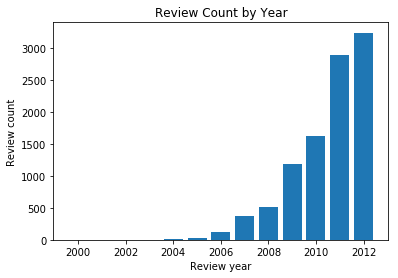

In [25]:
plt.bar(pd.value_counts(years).index,pd.value_counts(years))
#用value_counts統計不同年份的出現次數

plt.title('Review Count by Year')
plt.xlabel('Review year')
plt.ylabel('Review count')
#繪圖

4. Plot HeatMap using seaborn

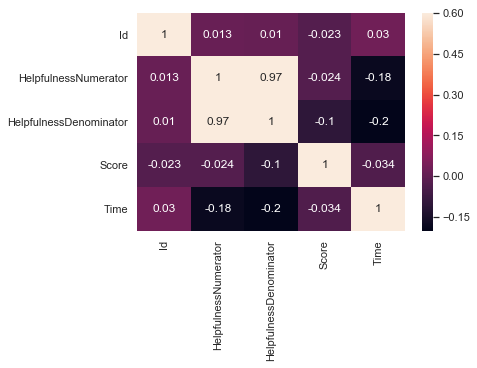

In [186]:
sns.set()
heat_data=pd_data[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']]
correlation= heat_data.corr()
ax=sns.heatmap(correlation,annot=True,vmax=0.6,vmin=-0.2)

5. Helpful percent